# Лабораторная работа №7

## «Классификация с использованием Наивного байесовского классификатора»
## Выполнили студенты Зимин Андрей Валерьевич и Жилин Андрей Игоревич

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Часть 1. Рассмотрите задачу классификации на классическом примере набора «Ирисы» (4 балла). 

### Загрузка датасета

In [3]:
data_x = [(2.6, 1.0), (3.0, 2.3), (3.4, 1.6), (3.0, 1.5), (2.7, 1.0), (3.8, 2.0), (3.0, 1.8), (2.8, 2.1), (2.9, 1.3), (3.0, 1.8), (3.2, 1.5), (2.7, 1.8), (3.0, 1.4), (3.3, 2.5), (2.7, 1.9), (2.6, 1.2), (3.1, 1.4), (2.7, 1.9), (3.1, 2.4), (3.0, 1.5), (2.8, 1.4), (3.1, 1.5), (2.5, 1.8), (2.8, 1.3), (2.8, 1.8), (2.2, 1.5), (3.3, 2.5), (3.2, 1.8), (3.6, 2.5), (3.0, 1.7), (2.3, 1.3), (2.8, 1.3), (2.5, 1.5), (3.0, 2.1), (2.0, 1.0), (2.8, 2.2), (3.0, 1.6), (3.1, 2.1), (3.2, 2.3), (2.5, 1.7), (2.5, 1.1), (3.2, 2.3), (2.8, 1.2), (2.9, 1.5), (2.6, 1.4), (2.2, 1.0), (3.3, 2.1), (2.4, 1.1), (3.4, 2.4), (3.0, 1.2), (2.8, 1.5), (3.2, 1.4), (3.8, 2.2), (2.8, 2.4), (3.0, 1.8), (3.0, 1.5), (3.0, 1.4), (3.0, 2.1), (2.4, 1.0), (3.4, 2.3), (2.7, 1.4), (2.3, 1.0), (2.9, 1.3), (3.3, 1.6), (2.7, 1.3), (2.6, 1.2), (2.4, 1.0), (3.2, 2.0), (3.1, 1.5), (3.0, 1.8), (2.8, 1.9), (2.7, 1.9), (2.8, 1.5), (3.2, 1.8), (3.1, 1.8), (2.5, 1.1), (2.2, 1.5), (2.9, 1.4), (3.0, 2.1), (2.9, 1.3), (2.8, 2.0), (2.5, 2.0), (3.0, 2.2), (3.2, 2.3), (3.1, 2.3), (2.8, 1.3), (2.5, 1.9), (3.0, 2.3), (2.9, 1.3), (2.9, 1.8), (3.0, 2.0), (2.9, 1.8), (2.7, 1.2), (2.5, 1.3), (3.0, 1.3), (2.6, 2.3), (2.8, 2.0), (2.9, 1.3), (2.7, 1.6), (2.3, 1.3)]
data_y = [-1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1]

X = np.array(data_x)
y = np.array(data_y)

### Задание: Выделить обучающую выборку (70% всей выборки, случайное разделение реализовать самостоятельно) и отобразить в виде графика точек на плоскости (объекты разных классов должны быть иметь разные маркеры и цвет, сделавшим в классе +1 балл). 

In [6]:
def train_test_split(X, y, seed, alpha):
  split = None
  if X.shape[0] == y.shape[0]:
    np.random.seed(seed)
    split = np.random.random(size=len(y))

  y_train = y[split <= alpha]
  y_test  = y[split >  alpha]
  X_train = X[split <= alpha]
  X_test  = X[split >  alpha]

  return y_train, y_test, X_train, X_test

y_train, y_test, X_train, X_test = train_test_split(X, y, 6, alpha=0.7)

print("Обучающая выборка:")
print(y_train)
print()
print("Тестовая выборка:")
print(y_test)

Обучающая выборка:
[ 1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1
 -1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1]

Тестовая выборка:
[-1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1  1  1  1  1]


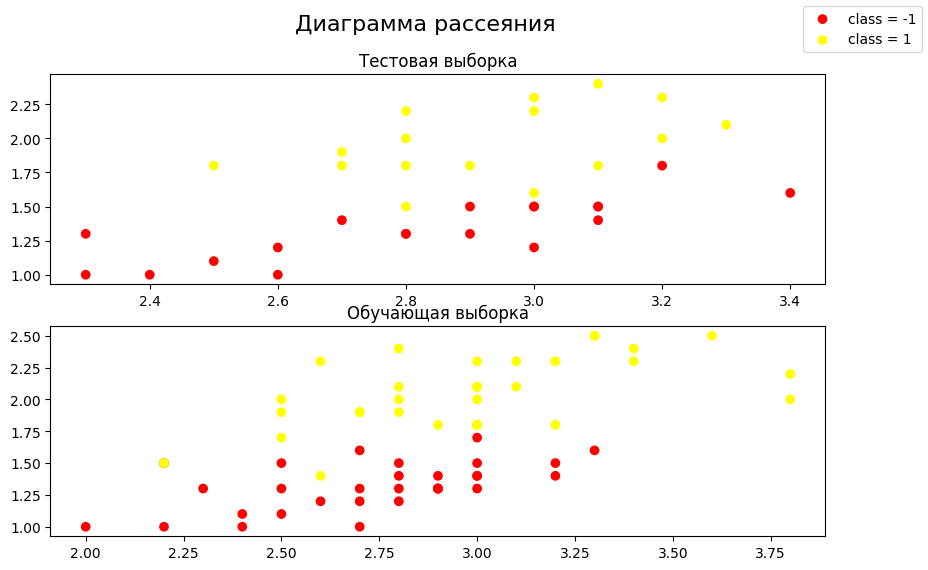

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="autumn")
ax[0].set_title("Тестовая выборка")
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="autumn")
ax[1].set_title("Обучающая выборка")
fig.suptitle('Диаграмма рассеяния', fontsize=16)
fig.legend(["class = -1", "class = 1"])

### Задание: Обучить модель. Отобразить тестовую выборку, чтобы было понятно качество классификации объектов из неё.

Формула Байеса имеет вид:
$$P(y_k|X_0,X_1,...,X_n)=\frac{P(y_k) \prod_{i=0}^n{P(X_i|y_k)} }{P(X_0,X_1,...,X_n)}$$

Где:  

$P(y_k|X_i)$ - апостериорная вероятность принадлежности объекта с набором признаков $X_0,X_1,...,X_n$ к классу $y_k$  
$P(y_k)$ - априорная вероятность принадлежности случайно выбранного объекта к классу $y_k$  
$P(X_i|y_k)$ - априорная вероятность того, что случайно выбранный объект класса $y_k$ обладает признаком $X_i$  
$P(X_0,X_1,...,X_n)$ - полная вероятность того, что случайно выбранный объект обладает набором признаков $X_0,X_1,...,X_n$  

Так как наивный Байесовский классификатор работает с категориальными данными, нам нужно перевести неприрывные признаки в категориальные. Для этого разобъём их на бины. Судя по распределениям, разобъём признаки на 4 и 2 бина.

In [92]:
n = 2
number_bins = [4, 2]
len_bins = [0]*n

for i in range(n): 
    len_bins[i] = (max(X[:, i]) - min(X[:, i])) / number_bins[i]


Теперь закодируем float с помощью булевых масок

In [116]:
new_X = X.copy()


for i in range(n):
    for k in range(number_bins[i]):
        A = X[:, i] >= min(X[:, i])+k*len_bins[i]
        if k == number_bins[i]-1:
            B = X[:, i] <= min(X[:, i])+(k+1)*len_bins[i]
        else:
            B = X[:, i] < min(X[:, i])+(k+1)*len_bins[i]
        AB = np.all([A, B], axis=0)
        new_X = np.insert(new_X, new_X.shape[1], AB, axis=1)
new_X[:5, :]

array([[2.6, 1. , 0. , 1. , 0. , 0. , 1. , 0. ],
       [3. , 2.3, 0. , 0. , 1. , 0. , 0. , 1. ],
       [3.4, 1.6, 0. , 0. , 0. , 1. , 1. , 0. ],
       [3. , 1.5, 0. , 0. , 1. , 0. , 1. , 0. ],
       [2.7, 1. , 0. , 1. , 0. , 0. , 1. , 0. ]])

Теперь нужно собрать из one-hot-encoding категории

In [117]:
F1 = np.argmax(new_X[:, [2, 3, 4, 5]], axis=-1)
F2 = np.argmax(new_X[:, [6, 7]], axis=-1) 
new_X = np.column_stack([F1, F2])
new_X[:5, :]

array([[1, 0],
       [2, 1],
       [3, 0],
       [2, 0],
       [1, 0]], dtype=int64)

После этого ещё раз разбиваем наши данные

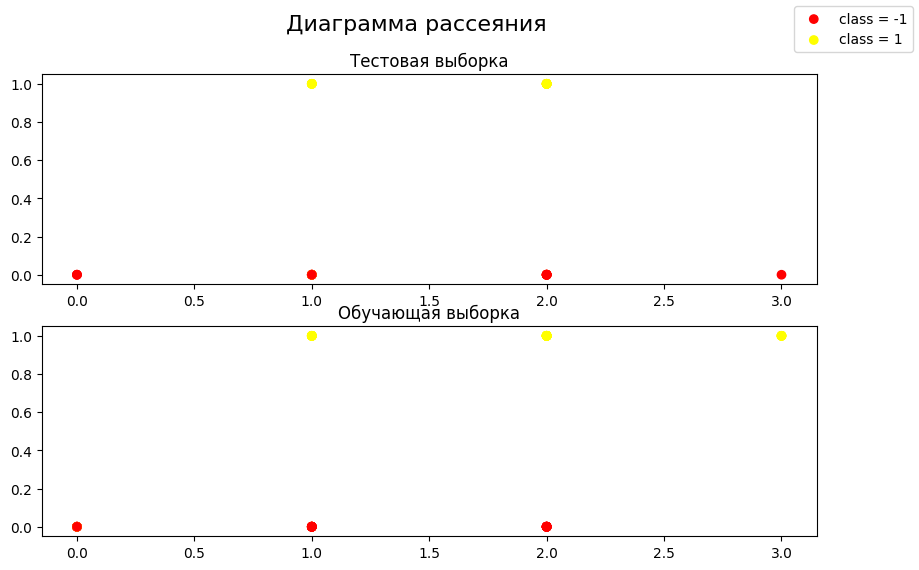

In [118]:
y_train, y_test, X_train, X_test = train_test_split(new_X, y, 6, alpha=0.7)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="autumn")
ax[0].set_title("Тестовая выборка")
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="autumn")
ax[1].set_title("Обучающая выборка")
fig.suptitle('Диаграмма рассеяния', fontsize=16)
fig.legend(["class = -1", "class = 1"])